<a href="https://colab.research.google.com/github/dhyu12/yolov3/blob/master/yolo_v3_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/PyTorch-YOLOv3-master/'

/content/drive/My Drive/PyTorch-YOLOv3-master


In [ ]:
!pip3 install -r requirements.txt

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=3e029803886324f973b46f70cf01372eb10c3aff59fbc1f1025b106b48f67b3f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


In [ ]:
!pip3 uninstall Pillow -y

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0


In [ ]:
!pip3 install Pillow

     |████████████████████████████████| 2.2MB 8.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
cd weights/

/content/drive/My Drive/PyTorch-YOLOv3-master/weights


In [ ]:
!ls

custom_weight	   download_weights.sh	yolov3.weights
darknet53.conv.74  yolov3-tiny.weights


In [ ]:
# 스크립트 내용을 한 번 볼까? 
!cat /content/PyTorch-YOLOv3/weights/download_weights.sh

cat: /content/PyTorch-YOLOv3/weights/download_weights.sh: No such file or directory


In [ ]:
!bash download_weights.sh

--2020-12-19 08:58:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-12-19 08:58:51--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-12-19 08:58:51--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieve

In [ ]:
cd ..

/content/drive/My Drive/PyTorch-YOLOv3-master


In [ ]:
cd data/

/content/drive/My Drive/PyTorch-YOLOv3-master/data


In [ ]:
cd /content/drive/My Drive/PyTorch-YOLOv3-master/

/content/drive/My Drive/PyTorch-YOLOv3-master


In [ ]:
 !python3 train.py

2020-12-19 08:58:58.937187: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Namespace(batch_size=8, checkpoint_interval=1, compute_map=False, data_config='config/custom.data', epochs=100, evaluation_interval=1, gradient_accumulations=2, img_size=416, model_def='config/yolov3_custom.cfg', multiscale_training=True, n_cpu=8, pretrained_weights=None)
2020-12-19 08:59:01.632053: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-19 08:59:01.633312: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-19 08:59:01.686678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-19 08:59:01.687270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720]

In [ ]:
ls -al data/custom_samples/

total 22
-rw------- 1 root root 12863 Aug 28 19:35 images.jpg
drwx------ 2 root root  4096 Aug 28 18:46 .ipynb_checkpoints/
-rw------- 1 root root  4354 Aug 28 19:17 testimage.jpg


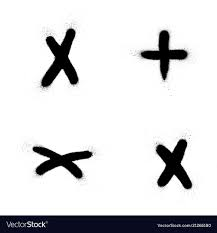

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/PyTorch-YOLOv3-master/data/custom_samples/testimage.jpg')

In [ ]:
!python3 detect.py --image_folder data/custom_samples/

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/custom_samples/', img_size=416, model_def='config/yolov3_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='/content/drive/My Drive/weight/yolov3_ckpt_99.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.480994
	+ Batch 1, Inference Time: 0:00:00.050823

Saving images:
(0) Image: 'data/custom_samples/images.jpg'
	+ Label: add, Conf: 0.98405
	+ Label: add, Conf: 0.85616
(1) Image: 'data/custom_samples/testimage.jpg'
	+ Label: add, Conf: 0.91675


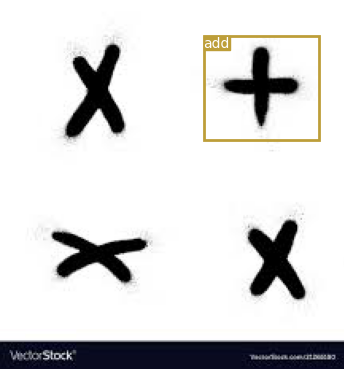

In [ ]:
Image('/content/drive/My Drive/PyTorch-YOLOv3-master/output/testimage.png')

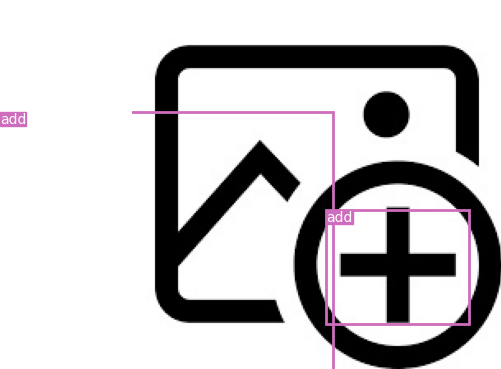

In [ ]:
Image('/content/drive/My Drive/PyTorch-YOLOv3-master/output/images.png')